Questions to be answered here :

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks'?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of Adani Enterprises inc using LSTM)

In [ ]:
!pip install -q yfinance

Importing Dependencies and Getting Stock data from yFinance into a DataFrame

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr



# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
stock_list = ['ADANIENT.NS', 'TCS.NS', '^NSEI', 'INFY.NS']

# Set up End and Start times for data grab
stock_list = ['ADANIENT.NS', 'TCS.NS', '^NSEI', 'INFY.NS']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create a dictionary to store the downloaded data
stock_data = {}
for stock in stock_list:
    stock_data[stock] = yf.download(stock, start, end)


# Use the dictionary keys for company names
company_list = [stock_data['ADANIENT.NS'], stock_data['TCS.NS'], stock_data['^NSEI'], stock_data['INFY.NS']]
company_name = ["ADANI", "TCS", "NIFTY50", "INFOSYS"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-07-12,1680.000000,1719.750000,1666.650024,1711.750000,1711.750000,17078316,INFOSYS
2024-07-15,1726.199951,1728.000000,1702.650024,1707.050049,1707.050049,6942230,INFOSYS
2024-07-16,1718.599976,1737.900024,1700.000000,1726.050049,1726.050049,6886281,INFOSYS
2024-07-18,1719.000000,1765.400024,1719.000000,1758.050049,1758.050049,11248896,INFOSYS
2024-07-19,1844.000000,1844.000000,1786.449951,1792.949951,1792.949951,29819116,INFOSYS
2024-07-22,1800.150024,1823.000000,1792.949951,1810.849976,1810.849976,8462126,INFOSYS
2024-07-23,1810.000000,1839.949951,1783.250000,1836.900024,1836.900024,7113056,INFOSYS
2024-07-24,1837.500000,1842.349976,1819.599976,1833.949951,1833.949951,6002845,INFOSYS
2024-07-25,1820.000000,1830.900024,1812.000000,1824.849976,1824.849976,5815599,INFOSYS


from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

Descriptive Statistics about the Data

In [ ]:
stock_data["ADANIENT.NS"].describe()

,Open,High,Low,Close,Adj Close,Volume
count,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,2867.385740,2905.440488,2819.110551,2858.521492,2857.520402,2.950789e+06
std,358.174716,360.799264,350.916464,356.397195,356.370467,3.215854e+06
min,2160.000000,2190.000000,2142.000000,2149.850098,2148.983398,5.774400e+05
25%,2498.474976,2534.399902,2466.287537,2496.950012,2495.943481,1.168912e+06
50%,2997.675049,3044.724976,2919.025024,2986.200073,2984.996338,1.794458e+06
75%,3170.299927,3206.412537,3129.275024,3165.812561,3164.536377,3.343494e+06
max,3725.000000,3743.899902,3586.050049,3645.250000,3643.780518,2.287908e+07


We only have 242 days of data because it excludes weekends i.e. Saturdays and Sundays and Public Holidays

Info about the data retrived

In [ ]:
stock_data["ADANIENT.NS"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2023-07-31 to 2024-07-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          242 non-null    float64
 1   High          242 non-null    float64
 2   Low           242 non-null    float64
 3   Close         242 non-null    float64
 4   Adj Close     242 non-null    float64
 5   Volume        242 non-null    int64  
 6   company_name  242 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.1+ KB


Plotting closing price of the stocks over time

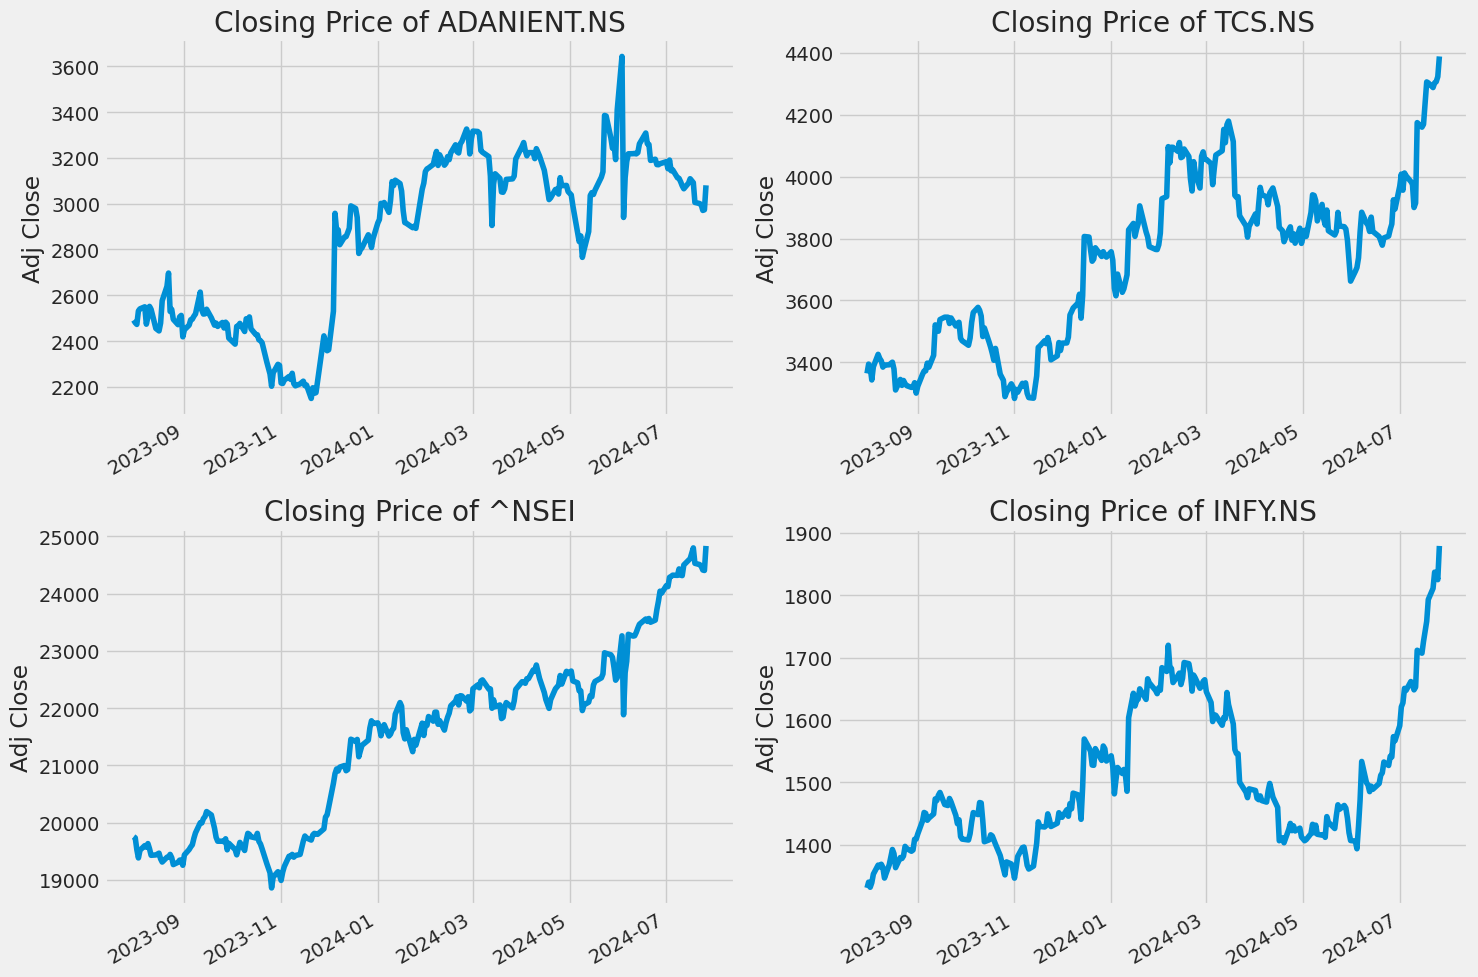

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")

plt.tight_layout()

Volume of Sales

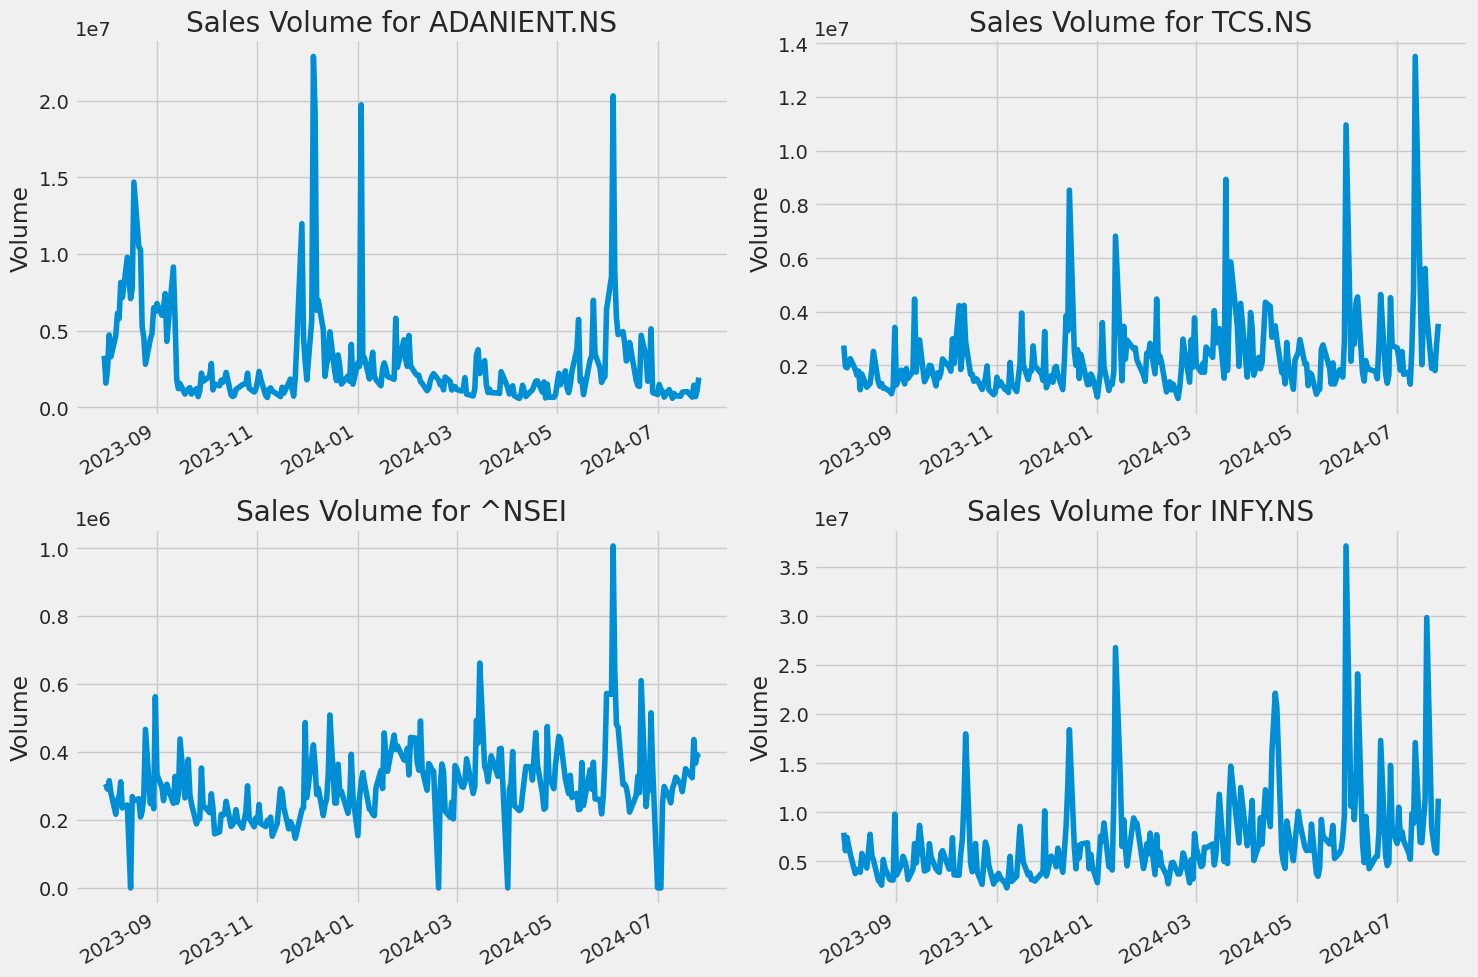

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")

plt.tight_layout()

What was the moving average of all these stocks?

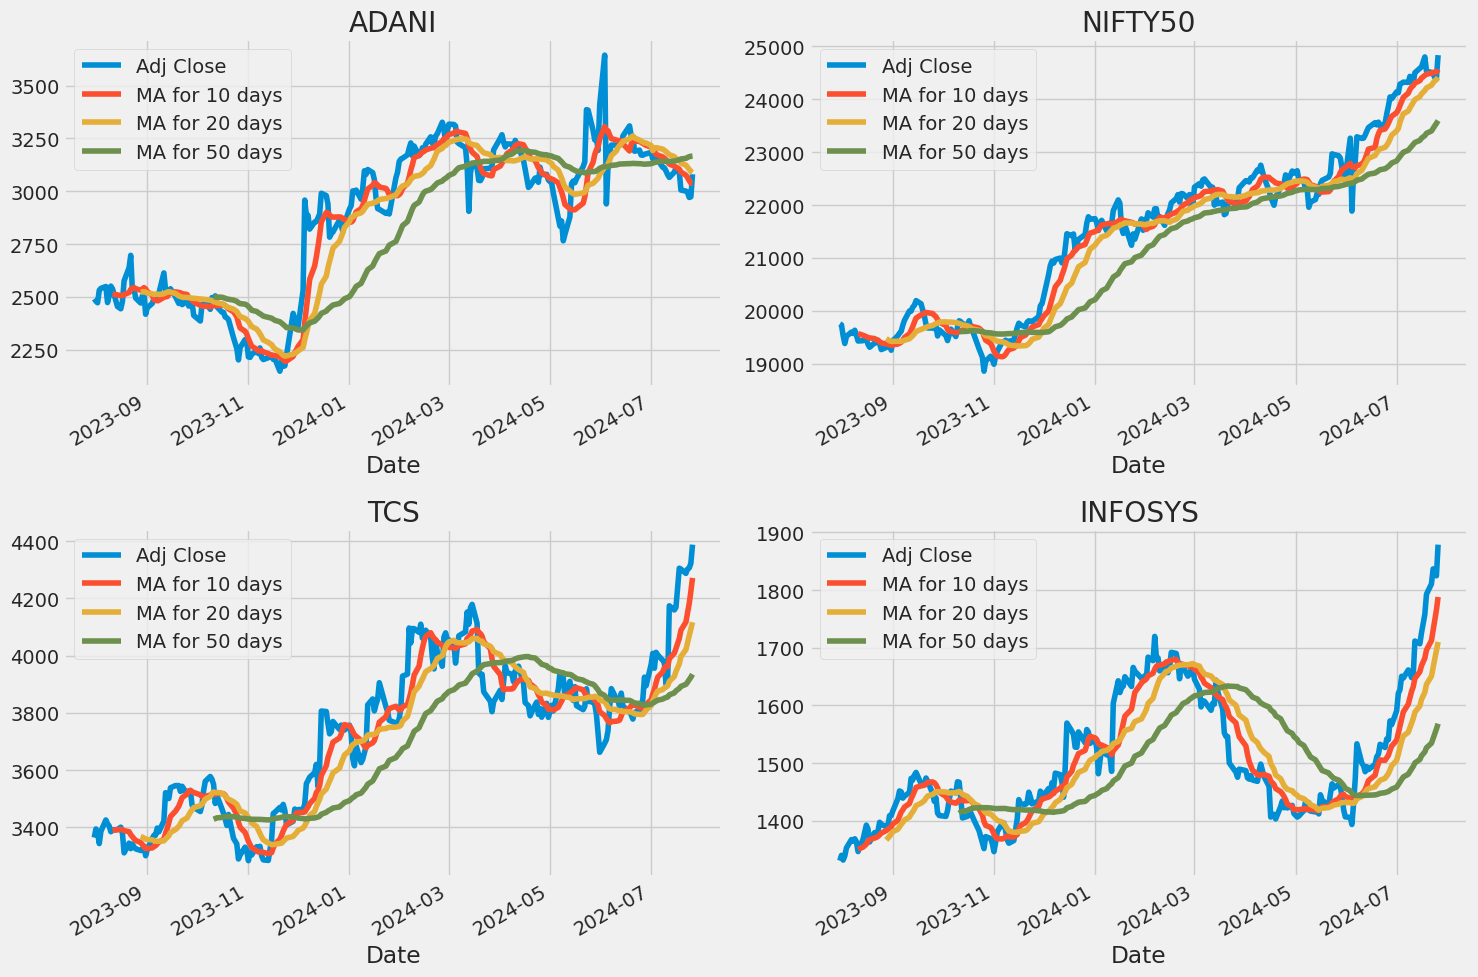

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_data["ADANIENT.NS"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ADANI')

stock_data["^NSEI"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('NIFTY50')

stock_data["TCS.NS"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TCS')

stock_data["INFY.NS"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('INFOSYS')

fig.tight_layout()

Daily Return of the stock on average

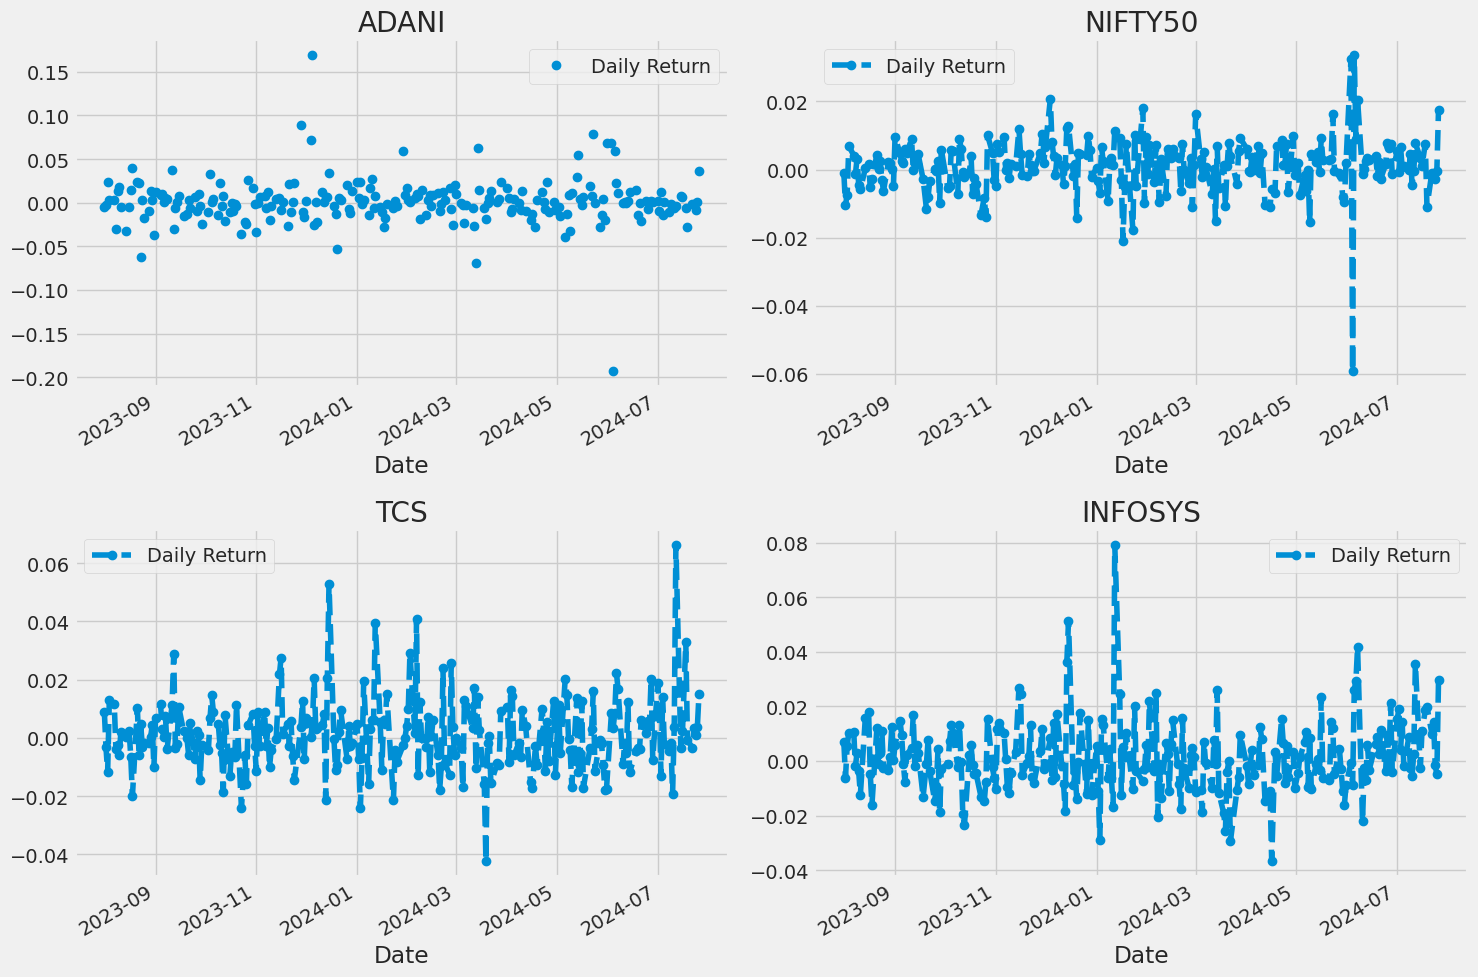

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_data["ADANIENT.NS"]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='', marker='o')
axes[0,0].set_title('ADANI')

stock_data["^NSEI"]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NIFTY50')

stock_data["TCS.NS"]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('TCS')

stock_data["INFY.NS"]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('INFOSYS')

fig.tight_layout()


Daily returns on a hist plot

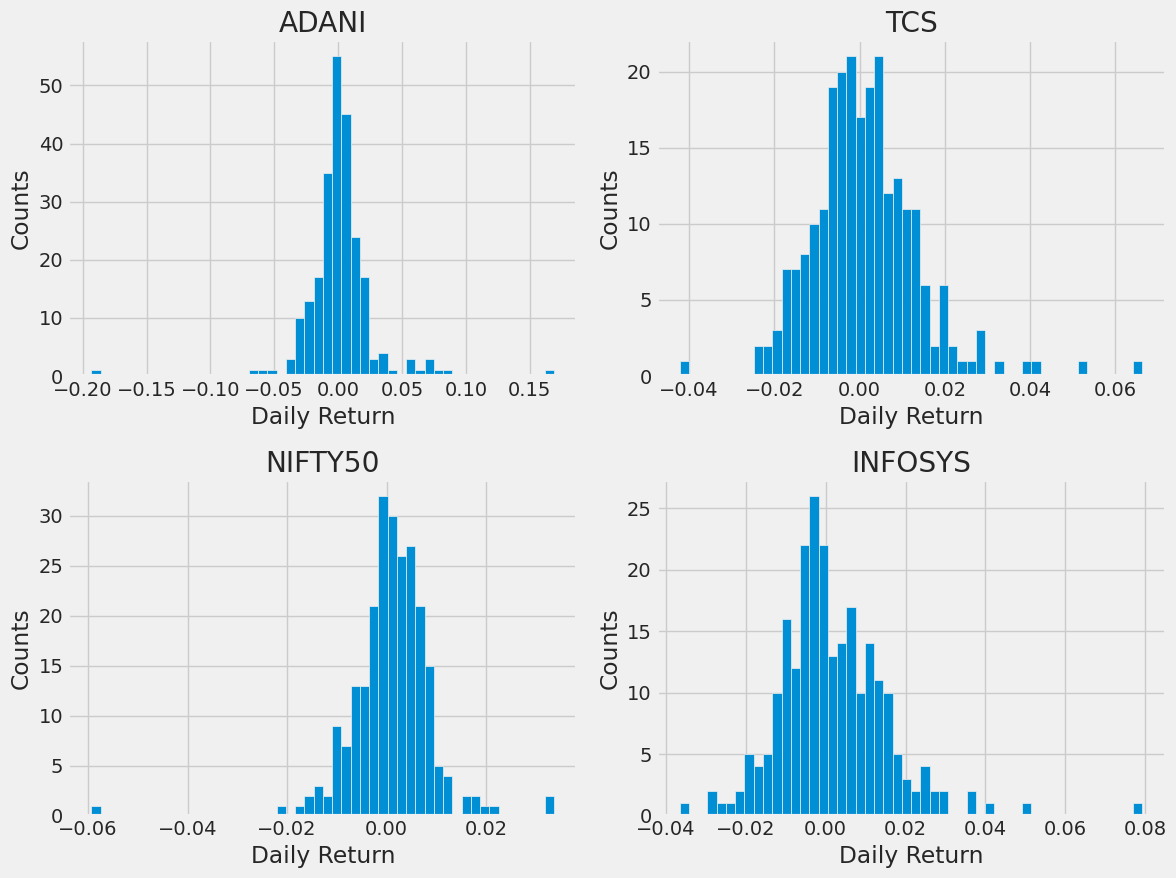

In [ ]:

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

Correlation between closing prices of different stocks

Getting closing prices for all the stocks in one dataframe

In [ ]:
closing_df = pd.DataFrame()
for ticker in stock_list:
    data = yf.download(ticker, start=start, end=end)
    closing_df[ticker] = data['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_rets = closing_df.pct_change()
stock_rets.head()

,ADANIENT.NS,TCS.NS,^NSEI,INFY.NS
Date,,,,
2023-07-31,NaN,NaN,NaN,NaN
2023-08-01,-0.004454,0.008943,-0.001025,0.007007
2023-08-02,-0.003043,-0.003302,-0.010490,-0.006116
2023-08-03,0.023873,-0.011829,-0.007421,0.005491
2023-08-04,0.003633,0.012824,0.006983,0.010298


Comparing stock price changes. First comparing one stock to itself.

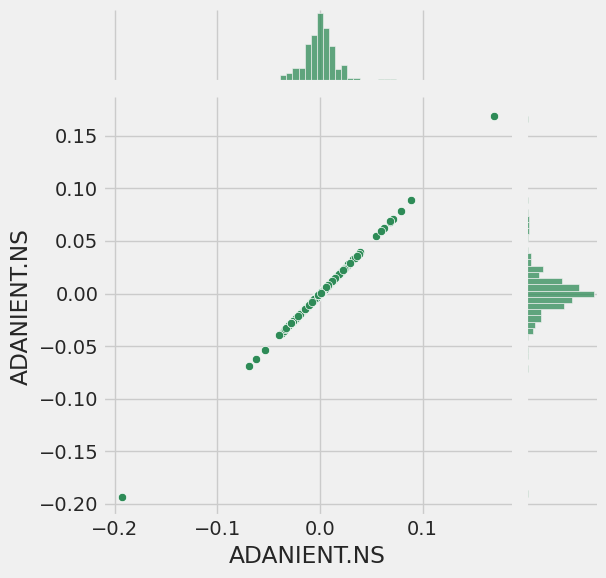

In [ ]:
sns.jointplot(x='ADANIENT.NS', y='ADANIENT.NS', data=stock_rets, kind='scatter', color='seagreen')

Now Comparing TCS stock to NIFTY50 Index

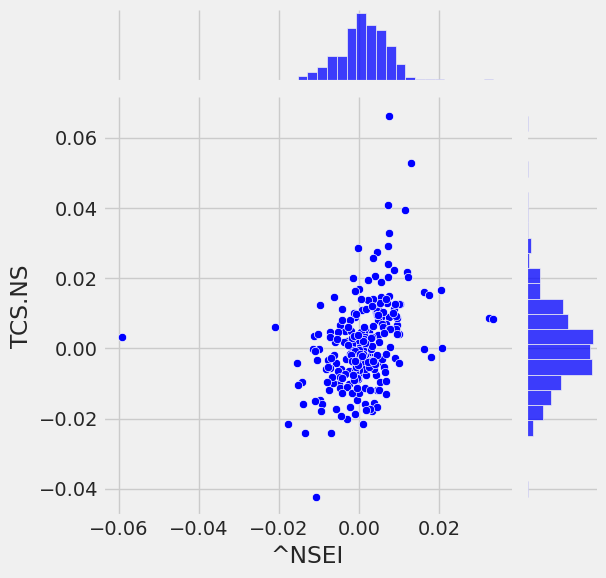

In [ ]:
sns.jointplot(x='^NSEI', y='TCS.NS', data=stock_rets, kind='scatter', color='blue')

We can see that they are positively correlated. Below is the matrix of every combination of stocks.

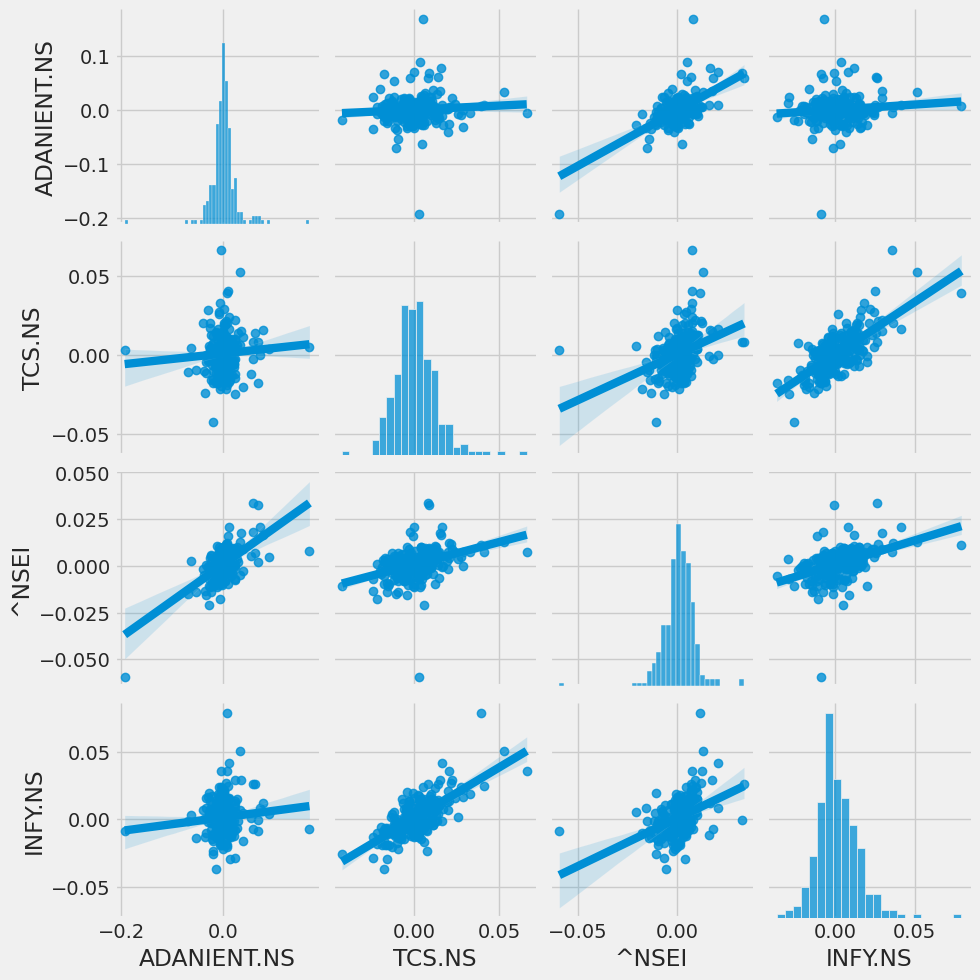

In [ ]:
sns.pairplot(stock_rets, kind='reg')

TCS and INFOSYS have a high positive correlation. Both of them being tech stocks its not surprising. A positive Correlation of all the stocks with NIFTY50 Index is also obvious. But, Adani being a conglomerate company in India has a higher positive correlation with NIFT50 Index

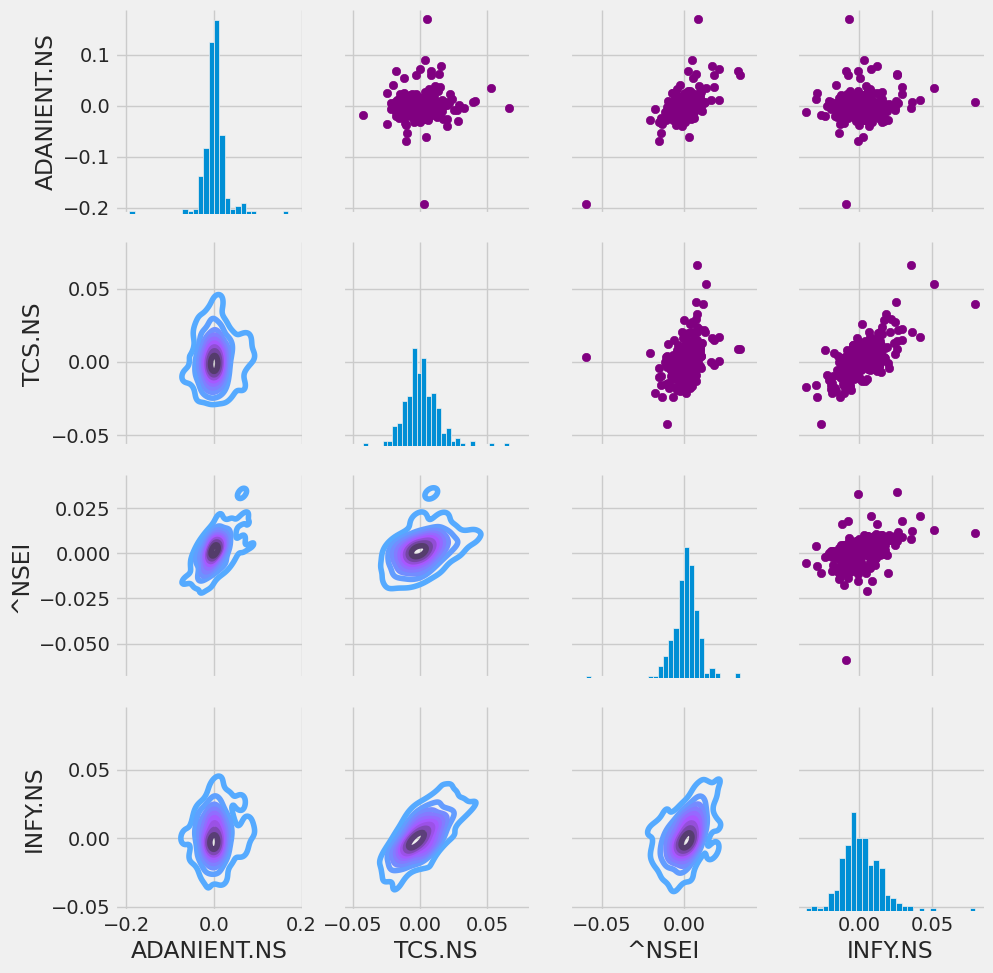

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Numerical Correlation plot matrix

Text(0.5, 1.0, 'Correlation of stock closing price')

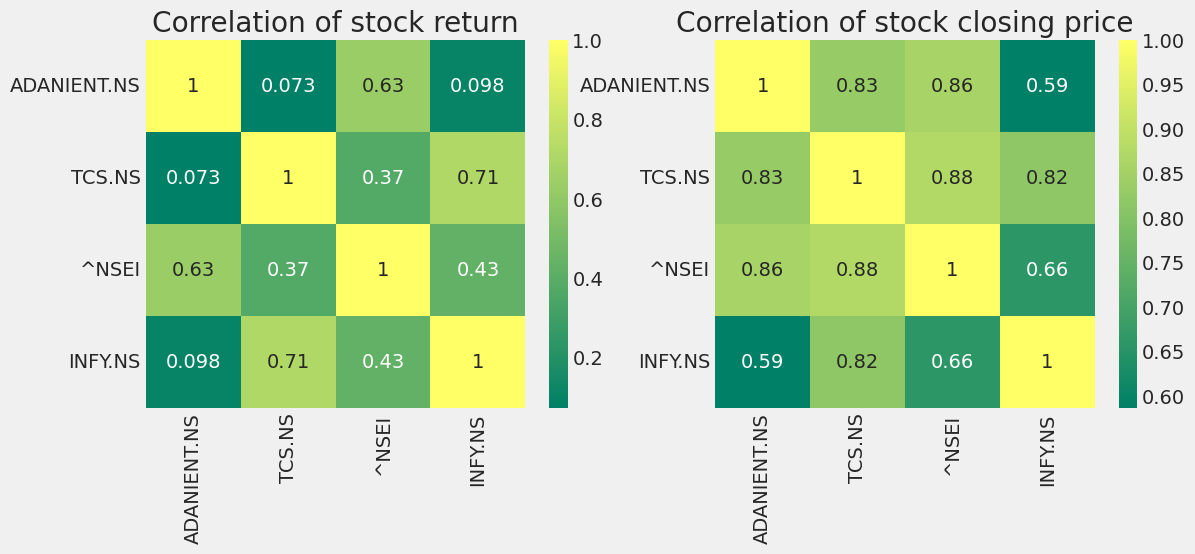

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

How much value do we put at risk by investing in a particular stock

Comparing the expected return with the standard deviation of the daily returns.

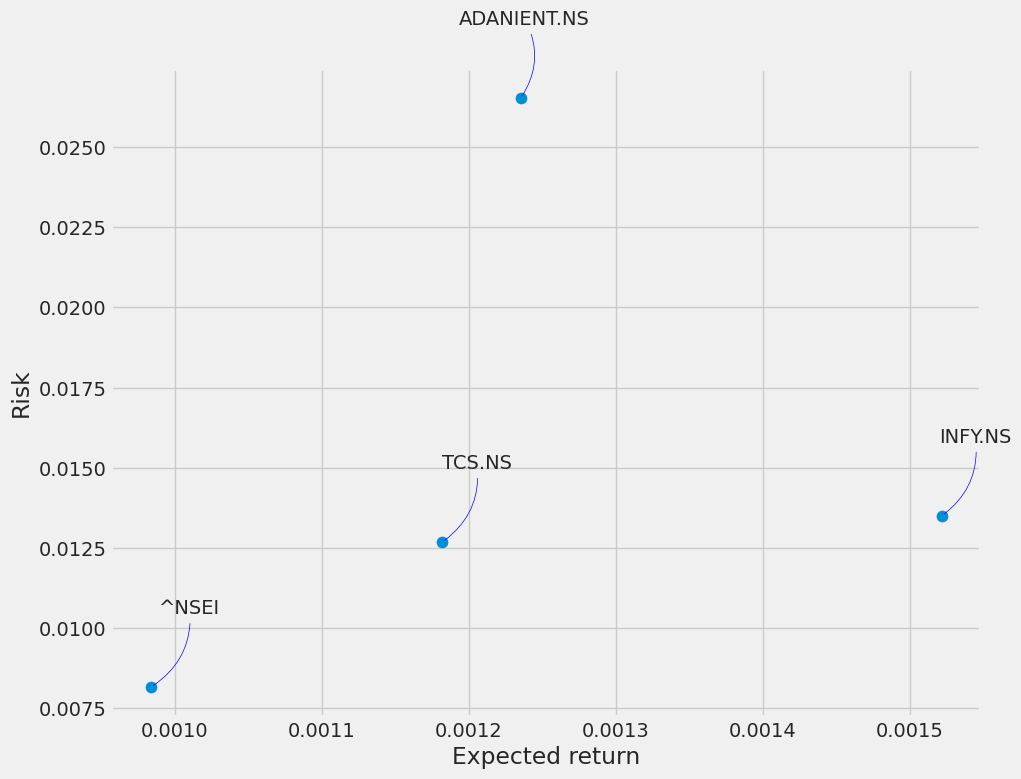

In [ ]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicting Closing Price of Adani Enterprises using LSTM

In [ ]:
df = yf.download('ADANIENT.NS', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,44.909592,44.909592,43.376842,44.242844,37.327030,4426427
2012-01-03,44.449768,45.062866,43.491798,44.043587,37.158920,7148175
2012-01-04,44.043587,45.062866,42.334572,42.633457,35.969219,7327278
2012-01-05,42.319244,42.564484,40.617889,40.939770,34.540283,6668403
2012-01-06,40.311340,41.920727,40.012455,41.162018,34.727795,7823555
...,...,...,...,...,...,...
2024-07-22,3005.699951,3026.899902,2972.149902,3000.850098,3000.850098,662085
2024-07-23,3020.000000,3038.000000,2886.350098,2995.350098,2995.350098,1443331
2024-07-24,2995.350098,3007.500000,2959.300049,2970.699951,2970.699951,693702


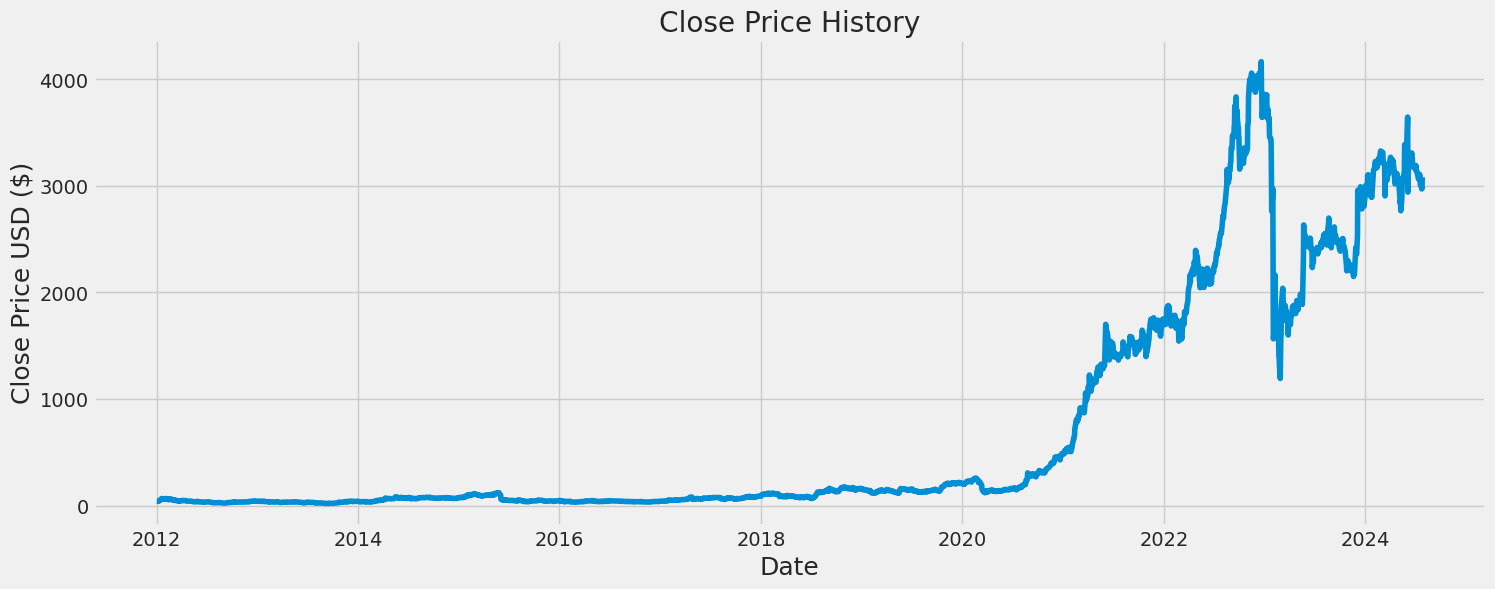

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2943

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00575395],
       [0.00570588],
       [0.00536567],
       ...,
       [0.71179088],
       [0.71246642],
       [0.73828124]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00575395, 0.00570588, 0.00536567, 0.00495705, 0.00501067,
       0.00498294, 0.00555796, 0.00669137, 0.00695578, 0.00702049,
       0.00820752, 0.00885096, 0.00986603, 0.01136923, 0.01008606,
       0.00985124, 0.01007866, 0.00986788, 0.01073874, 0.00962567,
       0.01045955, 0.01121207, 0.0109828 , 0.01088296, 0.0111677 ,
       0.0099289 , 0.01025062, 0.00956835, 0.00964231, 0.00886575,
       0.0082482 , 0.00907283, 0.00958314, 0.01039853, 0.01067773,
       0.0094001 , 0.00929471, 0.00900997, 0.00793202, 0.008679  ,
       0.00893786, 0.00863833, 0.00814096, 0.00835174, 0.00804111,
       0.00687627, 0.00682265, 0.00708335, 0.00740877, 0.00710924,
       0.00679676, 0.00644546, 0.00598692, 0.00559125, 0.00615148,
       0.00559125, 0.00575765, 0.00529726, 0.00561528, 0.0055894 ])]
[0.006160724034267024]

[array([0.00575395, 0.00570588, 0.00536567, 0.00495705, 0.00501067,
       0.00498294, 0.00555796, 0.00669137, 0.00695578, 0.00702049,
       0.00820752, 0.00885096, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
289/289 [==============================] - 28s 77ms/step - loss: 0.0011
Epoch 2/5
289/289 [==============================] - 24s 83ms/step - loss: 5.3309e-04
Epoch 3/5
289/289 [==============================] - 24s 82ms/step - loss: 3.6012e-04
Epoch 4/5
289/289 [==============================] - 22s 77ms/step - loss: 3.0774e-04
Epoch 5/5
289/289 [==============================] - 24s 82ms/step - loss: 2.4044e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 42ms/step


117.13758642994004

<ipython-input-79-206ffc3f2e63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


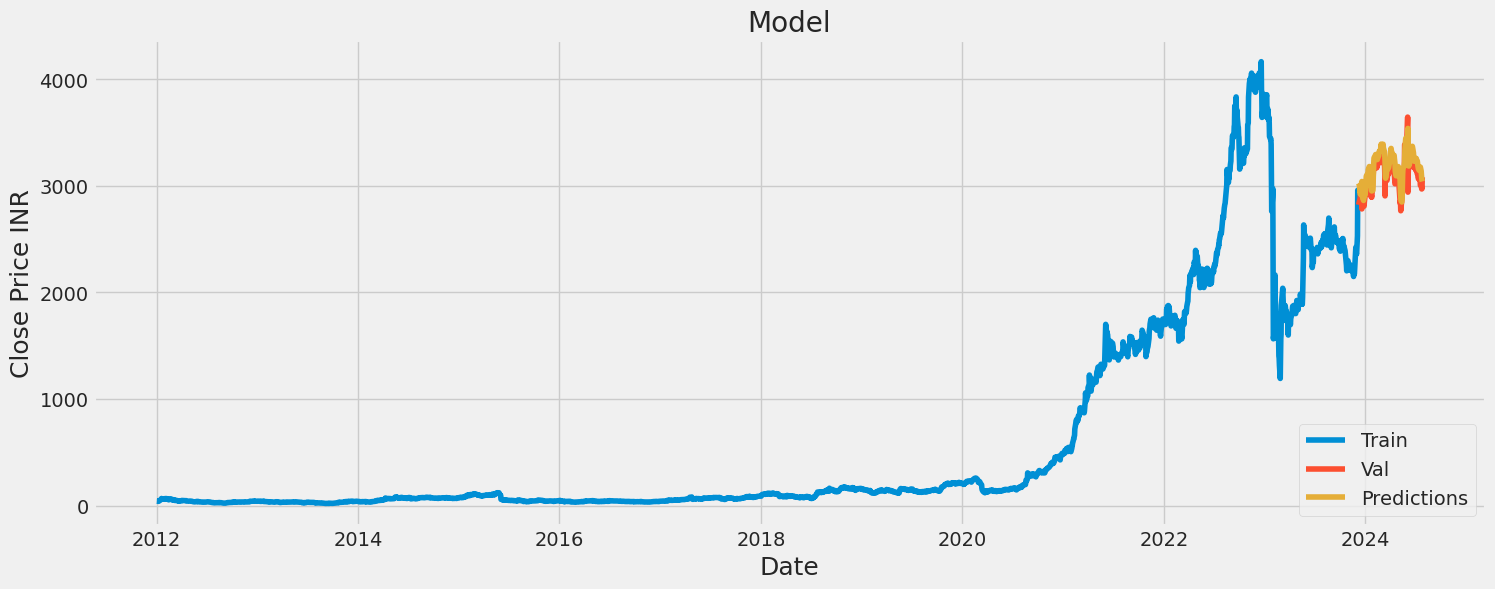

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-12-08,2822.149902,3025.026123
2023-12-11,2855.800049,3008.829834
2023-12-12,2857.649902,2972.638672
2023-12-13,2875.050049,2938.247803
2023-12-14,2894.050049,2923.025635
...,...,...
2024-07-22,3000.850098,3139.765625
2024-07-23,2995.350098,3100.486084
2024-07-24,2970.699951,3073.328125
